<a href="https://colab.research.google.com/github/Kickhands/HandSign-Detection/blob/main/Viskom_Handsign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sun Dec  7 09:59:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.1 MB/s eta 0:00:00


In [ ]:
import os

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.1/112.6 GB disk)


In [ ]:

from ultralytics import YOLO
from IPython.display import Image

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="hell nah")
project = rf.workspace("kickhands").project("hand-sign-bvuio-05bkb")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov12 in progress : 85.0%
Version export complete for yolov12 format



Extracting Dataset Version Zip to Hand-sign-1 in yolov12:: 100%|██████████| 2044/2044 [00:00<00:00, 7973.54it/s]


In [ ]:
ls

Hand-sign-1/


In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 9
names: ['10', '11', '12', '4', '5', '6', '7', '8', '9']

roboflow:
  workspace: kickhands
  project: hand-sign-bvuio-05bkb
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/kickhands/hand-sign-bvuio-05bkb/dataset/1

In [ ]:
model = YOLO("yolo12s.yaml")

In [ ]:
results = model.train(data=f'{dataset.location}/data.yaml',epochs = 100)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Hand-sign-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo12s.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

In [ ]:
# results = model.train( #awowokw grok
#     data=f'{dataset.location}/data.yaml',   # dari Roboflow, tetap seperti ini
#     epochs=100,              # cukup 600, biasanya terbaik di epoch 350–500
#     patience=80,             # early stopping biar nggak buang-buang waktu
#     imgsz=640,               # paling aman di T4 16GB
#     batch=16,                # default & nggak pernah OOM
#     optimizer='AdamW',
#     lr0=0.001,
#     lrf=0.01,
#     weight_decay=0.0005,
#     warmup_epochs=3,
#     box=7.5,
#     cls=0.5,
#     dfl=1.5,
#     scale=0.9,               # augmentasi agresif karena data cuma 312 images
#     translate=0.2,
#     mosaic=1.0,
#     mixup=0.3,
#     copy_paste=0.2,
#     fliplr=0.5,
#     degrees=10.0,
#     hsv_h=0.015,
#     hsv_s=0.7,
#     hsv_v=0.4,
#     cache='disk',            # hemat RAM
#     project='runs/train',    # default folder di session Colab (bukan Drive)
#     name='26class_312img',
#     exist_ok=True,
#     pretrained=True,
#     plots=True,
#     save=True,               # tetap True supaya ada best.pt & last.pt
#     save_period=-1,          # INI YANG PENTING → matiin auto-save tiap N epoch
#     device=0
# )

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=disk, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Bahasa-Isyarat-Alphabet-BISINDO-2/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.3, mode=train, model=yolo12s.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=26class_312img, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=80, pe

In [ ]:
cd /content/runs

/content/runs


In [ ]:
ls

detect/


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train

args.yaml			 results.csv	      val_batch0_labels.jpg
BoxF1_curve.png			 results.png	      val_batch0_pred.jpg
BoxP_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxPR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
BoxR_curve.png			 train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch5040.jpg  val_batch2_pred.jpg
confusion_matrix.png		 train_batch5041.jpg  weights
labels.jpg			 train_batch5042.jpg


In [ ]:
ls

detect/


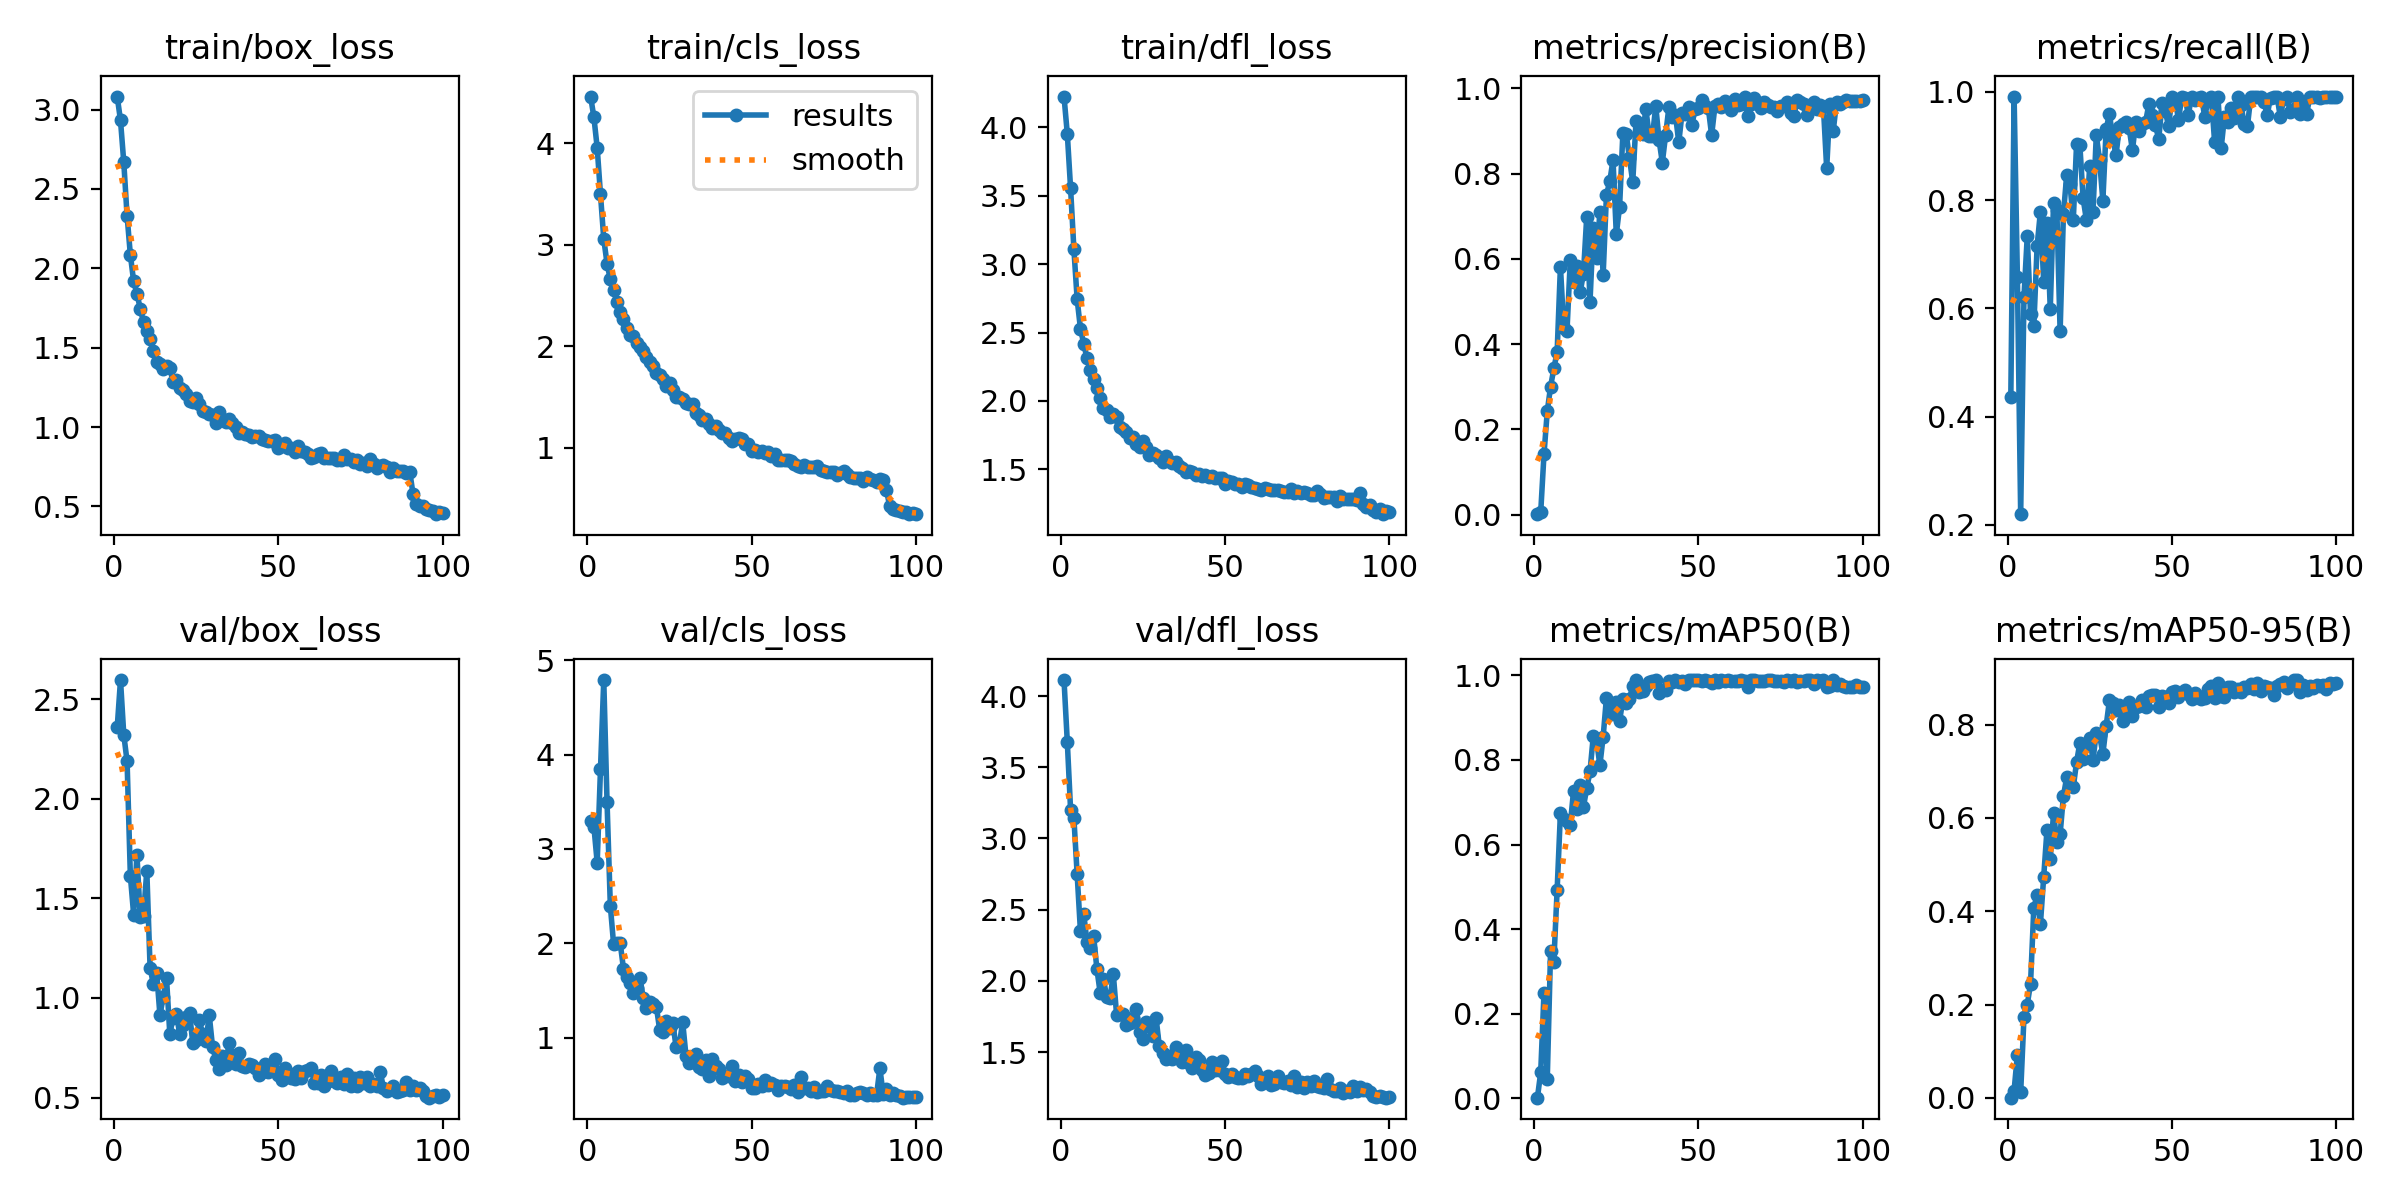

In [ ]:

Image(filename=f'{HOME}/runs/detect/train/results.png',width=1000)


In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>